In [1]:
from google.colab import files
uploaded = files.upload()


Saving metadata.csv to metadata.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Uyarıları gizle (isteğe bağlı)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# metadata.csv dosyasını oku
df = pd.read_csv("metadata.csv")

# İlk 5 satıra bakalım
df.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
print("Benzersiz makale sayısı:", df['title'].nunique())
print("Benzersiz yayın yılı sayısı:", df['publish_time'].dropna().apply(lambda x: str(x)[:4]).nunique())
print("Benzersiz kaynak (source_x) sayısı:", df['source_x'].nunique())


Benzersiz makale sayısı: 850366
Benzersiz yayın yılı sayısı: 123
Benzersiz kaynak (source_x) sayısı: 49


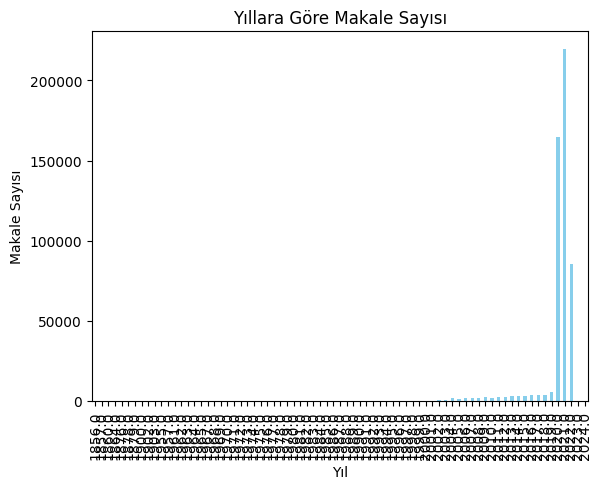

In [5]:
df['year'] = pd.to_datetime(df['publish_time'], errors='coerce').dt.year
year_counts = df['year'].value_counts().sort_index()

# Görselleştir
year_counts.plot(kind='bar', color='skyblue', title='Yıllara Göre Makale Sayısı')
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.show()


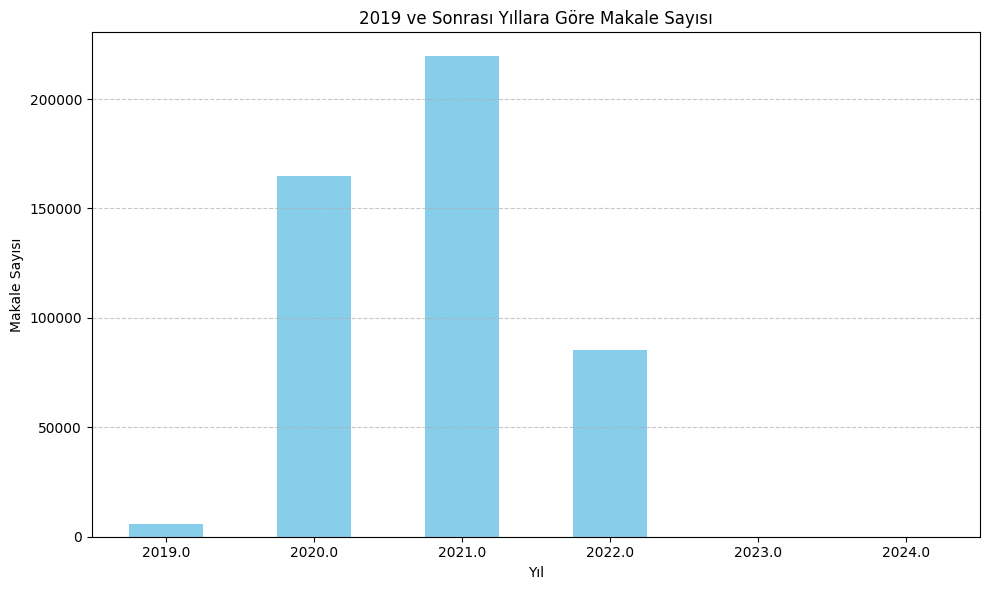

In [6]:


# 2019 ve sonrası
year_counts = df[df['year'] >= 2019]['year'].value_counts().sort_index()

# Görselleştir
plt.figure(figsize=(10,6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('2019 ve Sonrası Yıllara Göre Makale Sayısı')
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

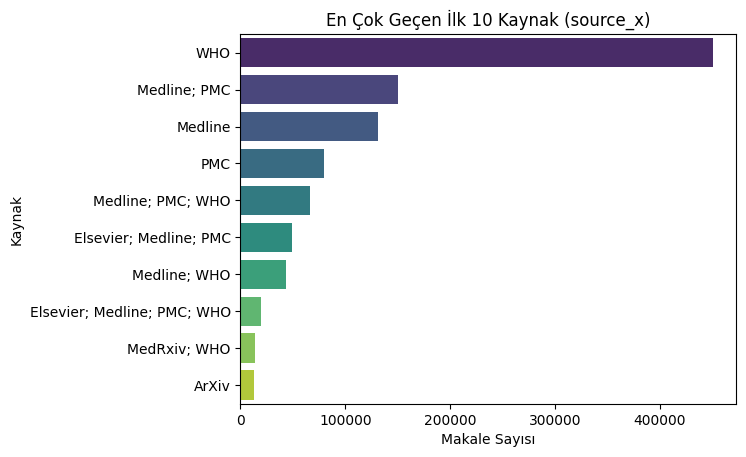

In [7]:
source_counts = df['source_x'].value_counts().head(10)

# Görselleştir
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')
plt.title("En Çok Geçen İlk 10 Kaynak (source_x)")
plt.xlabel("Makale Sayısı")
plt.ylabel("Kaynak")
plt.show()


In [8]:
print("Boş abstract sayısı:", df['abstract'].isna().sum())
print("\nVerideki eksik değerlerin sayısı:\n")
print(df.isnull().sum())


Boş abstract sayısı: 235544

Verideki eksik değerlerin sayısı:

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
year                 537789
dtype: int64


In [9]:
df_clean = df.dropna(subset=['abstract', 'publish_time']).copy()
print(f"Temizlenmiş veri boyutu: {df_clean.shape}")


Temizlenmiş veri boyutu: (819393, 20)


Abstract ortalama kelime sayısı: 164.60912119319366


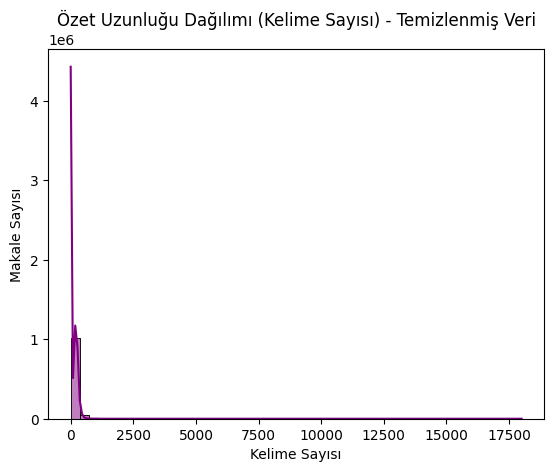

In [10]:

# abstract sütunundaki eksik değerleri boş string ile doldurup kelime sayısını hesapla
df['abstract_length'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

# Ortalama kelime sayısı
print("Abstract ortalama kelime sayısı:", df['abstract_length'].mean())

# Dağılım grafiği
sns.histplot(df['abstract_length'], bins=50, kde=True, color='purple')
plt.title("Özet Uzunluğu Dağılımı (Kelime Sayısı) - Temizlenmiş Veri")
plt.xlabel("Kelime Sayısı")
plt.ylabel("Makale Sayısı")
plt.show()

In [11]:
# Temel anahtar kelimeler
keywords = ['covid', 'pandemic', 'virus', 'coronavirus', 'sars-cov-2', 'outbreak', 'infection']

# Özetlerde geçenleri kontrol et (NaN olmayanlar için)
def contains_keyword(text):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(keyword in text for keyword in keywords)

df['covid_related'] = df['abstract'].apply(contains_keyword)


In [4]:
df = pd.read_csv("metadata.csv", low_memory=False)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')  # tarih sütunu
df = df.dropna(subset=['publish_time'])  # geçersiz tarihleri çıkar


In [5]:
# Küçük harfe çevir ve anahtar kelimelerle filtrele
keywords = ['covid', 'pandemic', 'sars', 'corona', 'ncov']
pattern = '|'.join(keywords)

df['abstract_clean'] = df['abstract'].astype(str).str.lower()
covid_df = df[df['abstract_clean'].str.contains(pattern, na=False)]


In [6]:
monthly_counts = covid_df.groupby(covid_df['publish_time'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()  # grafikte düzgün gösterim için


In [7]:
yearly_counts = covid_df.groupby(covid_df['publish_time'].dt.year).size()


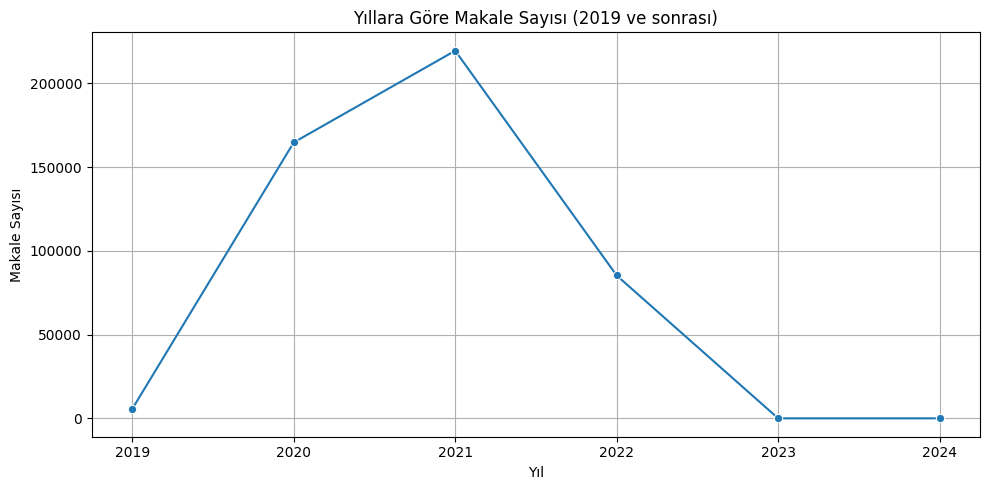

In [13]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year

yearly_counts = df[df['year'] >= 2019]['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Yıllara Göre Makale Sayısı (2019 ve sonrası)")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()


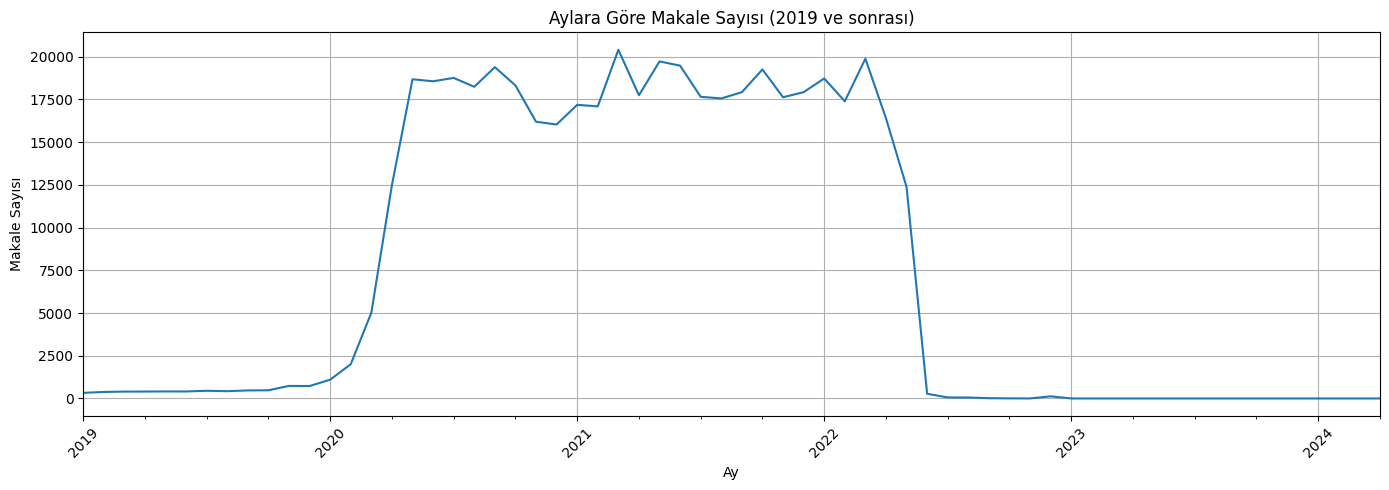

In [14]:
df['month'] = df['publish_time'].dt.to_period('M')

monthly_counts = df[df['year'] >= 2019].groupby('month').size()

plt.figure(figsize=(14, 5))
monthly_counts.plot()
plt.title("Aylara Göre Makale Sayısı (2019 ve sonrası)")
plt.xlabel("Ay")
plt.ylabel("Makale Sayısı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


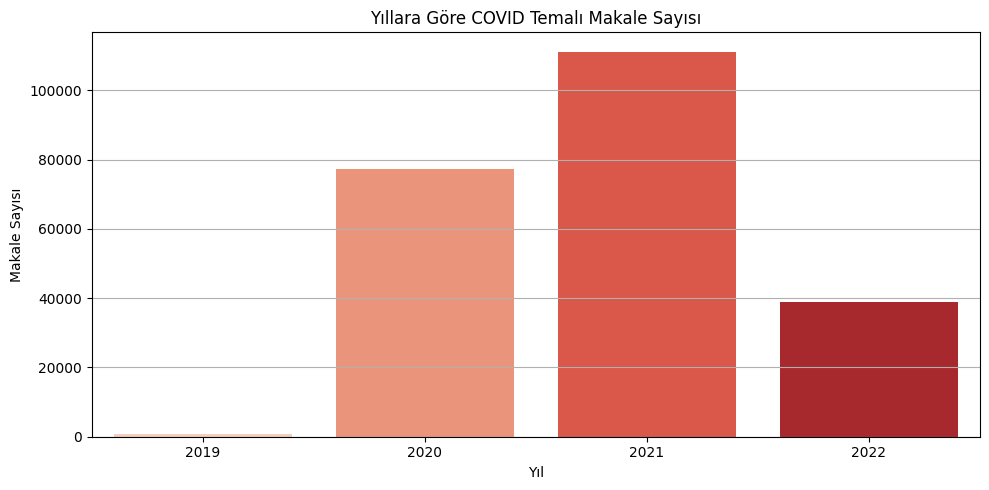

In [15]:
top_sources = covid_df['source_x'].value_counts().head(5).index  # en çok yayın yapan 5 kaynak
source_df = covid_df[covid_df['source_x'].isin(top_sources)].copy()
source_df['month'] = source_df['publish_time'].dt.to_period('M').dt.to_timestamp()

keywords = ['covid', 'pandemic', 'sars-cov-2', 'coronavirus']

# Anahtar kelimeleri içeren özetleri filtrele
df['abstract_lower'] = df['abstract'].fillna('').str.lower()
covid_related = df[df['abstract_lower'].str.contains('|'.join(keywords), na=False)]

covid_yearly = covid_related[covid_related['year'] >= 2019]['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=covid_yearly.index, y=covid_yearly.values, palette='Reds')
plt.title("Yıllara Göre COVID Temalı Makale Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [16]:
# Sütun isimlerini yazdır
print(df.columns)


Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'abstract_clean', 'year', 'month', 'abstract_lower'],
      dtype='object')


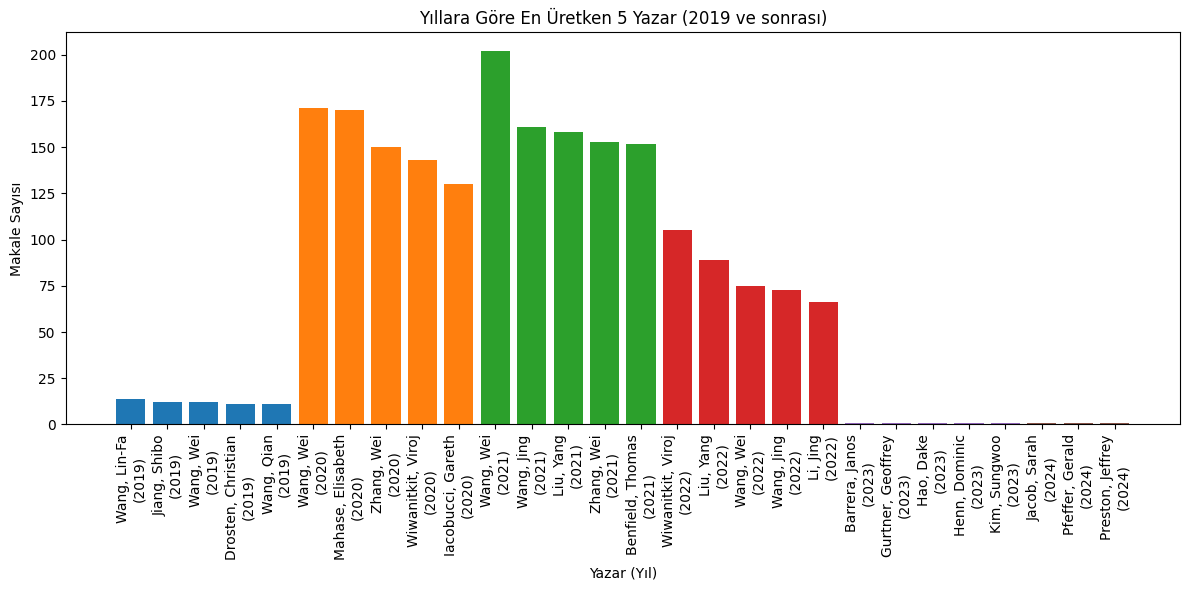

In [17]:

# 2019 ve sonrası verileri filtrele
df_covid_years = df[df['year'] >= 2019].copy()

# Yazarları ayır, her bir yılına karşılık eşleştir
author_years = []

for _, row in df_covid_years.iterrows():
    if pd.notna(row['authors']):
        authors = [a.strip() for a in row['authors'].split(';') if a.strip()]
        for author in authors:
            author_years.append((row['year'], author))

# Pandas DataFrame'e dönüştür
author_year_df = pd.DataFrame(author_years, columns=['year', 'author'])

# Her yılın en çok yayın yapan ilk 5 yazarı
top_authors_by_year = (
    author_year_df.groupby(['year', 'author'])
    .size()
    .reset_index(name='count')
    .sort_values(['year', 'count'], ascending=[True, False])
    .groupby('year')
    .head(5)
)

# Her yıl için en çok yayın yapan yazarları görselleştir
plt.figure(figsize=(12, 6))
for year in sorted(top_authors_by_year['year'].unique()):
    top = top_authors_by_year[top_authors_by_year['year'] == year]
    plt.bar([f"{a}\n({year})" for a in top['author']], top['count'], label=str(year))

plt.xticks(rotation=90)
plt.title("Yıllara Göre En Üretken 5 Yazar (2019 ve sonrası)")
plt.xlabel("Yazar (Yıl)")
plt.ylabel("Makale Sayısı")
plt.tight_layout()
plt.show()

In [4]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

True

In [6]:
import pandas as pd

# Dosyayı oku
df = pd.read_csv("metadata.csv", low_memory=False)
texts = df['title'].dropna().astype(str).tolist()  # abstract ile değiştirebilirsin

# Temizleme fonksiyonu
stop_words = set(stopwords.words("english"))
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

tokenized_texts = [preprocess(text) for text in texts]


In [7]:
# Dictionary ve Corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# LDA modeli (5 konu örneği)
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10,
    per_word_topics=True
)


In [8]:
# Konuları yazdır
for idx, topic in lda_model.print_topics(-1):
    print(f"Konu {idx + 1}: {topic}")


Konu 1: 0.044*"patients" + 0.023*"disease" + 0.021*"coronavirus" + 0.020*"study" + 0.016*"clinical" + 0.015*"case" + 0.014*"infection" + 0.013*"review" + 0.013*"respiratory" + 0.012*"acute"
Konu 2: 0.044*"pandemic" + 0.024*"health" + 0.014*"study" + 0.013*"impact" + 0.012*"care" + 0.011*"among" + 0.007*"social" + 0.007*"analysis" + 0.006*"healthcare" + 0.006*"mental"
Konu 3: 0.014*"infection" + 0.014*"human" + 0.011*"virus" + 0.009*"vaccine" + 0.009*"cells" + 0.009*"cell" + 0.008*"immune" + 0.008*"response" + 0.008*"detection" + 0.007*"protein"
Konu 4: 0.015*"potential" + 0.012*"using" + 0.008*"molecular" + 0.008*"novel" + 0.008*"learning" + 0.007*"era" + 0.007*"new" + 0.007*"virus" + 0.007*"infectious" + 0.007*"approach"
Konu 5: 0.031*"de" + 0.015*"la" + 0.012*"en" + 0.007*"longitudinal" + 0.007*"change" + 0.006*"et" + 0.006*"rates" + 0.006*"large" + 0.006*"new" + 0.006*"city"


In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # gensim <--> pyLDAvis köprüsü
import matplotlib.pyplot as plt

# pyLDAvis görselleştirmesi oluştur
pyldavis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Etkileşimli HTML olarak aç
pyLDAvis.display(pyldavis_data)

# (İsteğe bağlı) Dosya olarak kaydetmek istersen:
pyLDAvis.save_html(pyldavis_data, 'lda_topics_visualization.html')


In [11]:
!pip install pyLDAvis gensim matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.6 MB/s eta 0:00:00


In [13]:
pip install sentence-transformers umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 590.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli